#Uploading the dataset and importing the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
cell_df=pd.read_csv("/content/tumor.csv")

In [4]:
cell_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
cell_df.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4
682,897471,4,8,8,5,4,5,10,4,1,4


#Dataset Refining

##Removing 'Sample code number' column

In [6]:
cell_df.drop('Sample code number',axis=1,inplace=True)

In [7]:
cell_df.shape

(683, 10)

##Checking for non-zero and null values

In [8]:
cell_df.isnull().sum()
cell_df.isna().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [9]:
cell_df.count()

,0
Clump Thickness,683
Uniformity of Cell Size,683
Uniformity of Cell Shape,683
Marginal Adhesion,683
Single Epithelial Cell Size,683
Bare Nuclei,683
Bland Chromatin,683
Normal Nucleoli,683
Mitoses,683
Class,683


##Identifying the column names

In [10]:
cell_df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [11]:
col_names = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
for x in col_names:
    print(cell_df[x].nunique())

10
10
10
10
10
10
10
10
9
2


##Checking if the dataset is biased or not

In [12]:
target_count = cell_df.Class.value_counts()
print('Benign:', target_count[2])
print('Malignant:', target_count[4])

Benign: 444
Malignant: 239


###Here, 444 rows show Benign, and 239 rows show Malignant, which is a ratio of about 2:1, which is acceptable

##Checking if all the columns are of the integer type

In [13]:
cell_df.dtypes

,0
Clump Thickness,int64
Uniformity of Cell Size,int64
Uniformity of Cell Shape,int64
Marginal Adhesion,int64
Single Epithelial Cell Size,int64
Bare Nuclei,int64
Bland Chromatin,int64
Normal Nucleoli,int64
Mitoses,int64
Class,int64


In [14]:
cell_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


##Checking if dataset has any bias

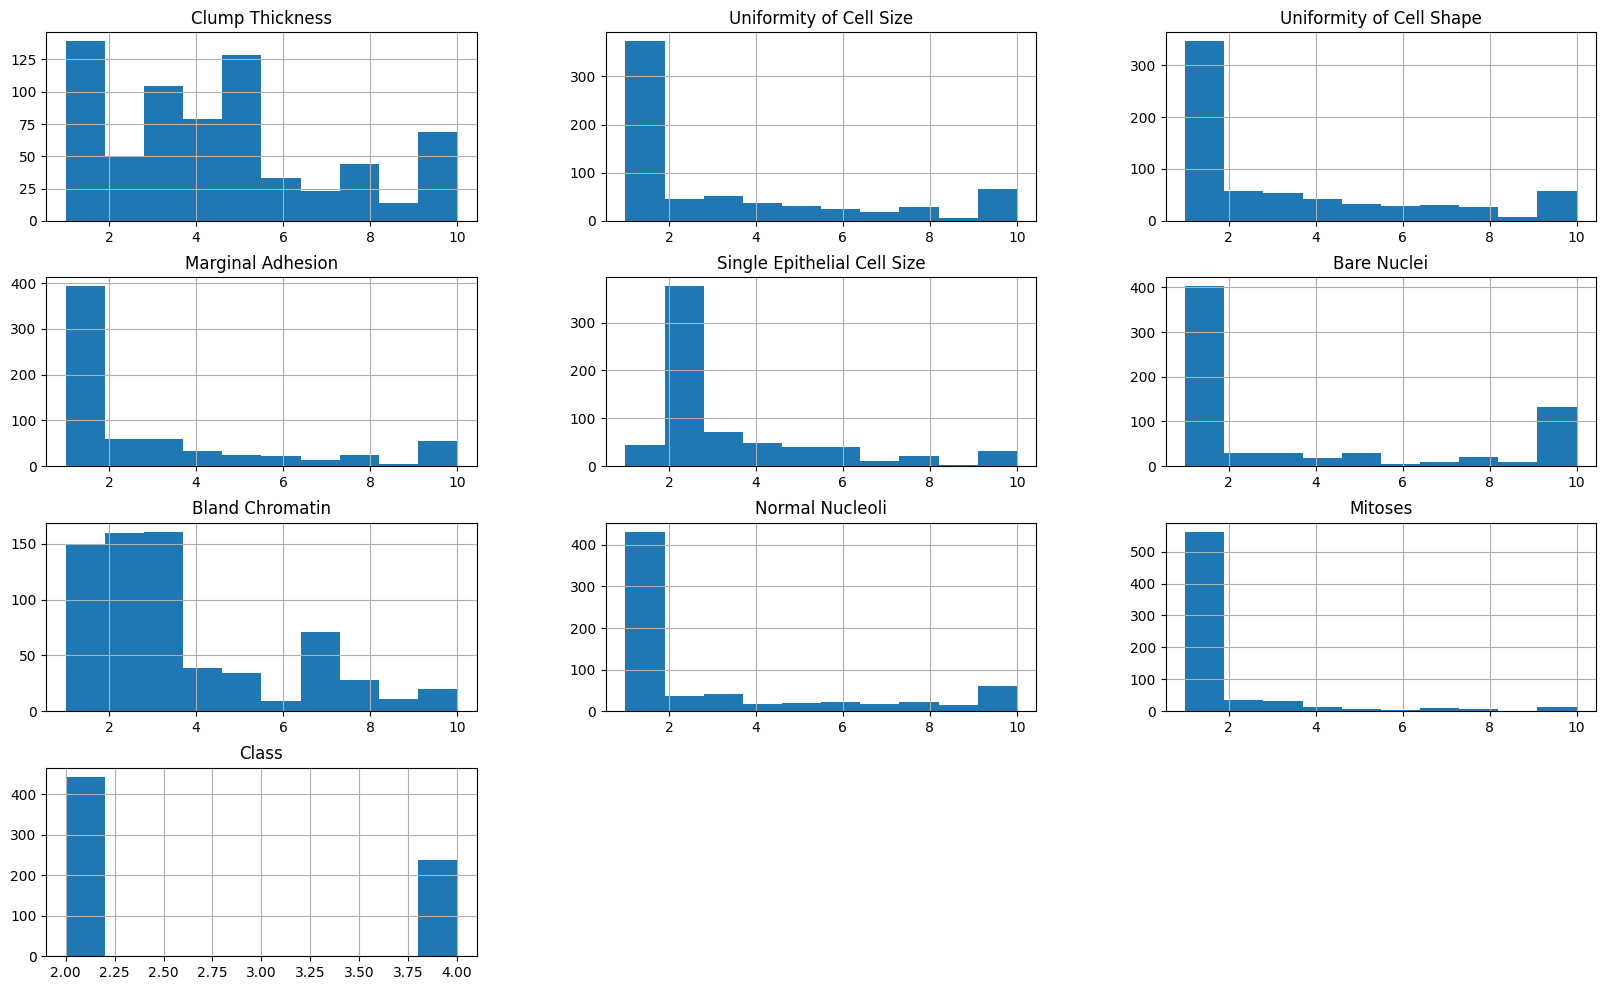

In [15]:
cell_df.hist(figsize=(20,12))
plt.show()

#Spillting the dataset into training and testing in 90:10 ratio

In [18]:
feature_df=cell_df[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]
x=np.asarray(feature_df)
y=np.asarray(cell_df['Class'])

In [19]:
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

##Splitting in 90-10 ratio

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=4)
x_train.shape

(614, 9)

#Training using various models

##Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(C=100,random_state=0)
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)
correct = (y_test == y_pred).sum()
incorrect = (y_test != y_pred).sum()
accuracy = correct / (correct + incorrect) * 100

print('\nPercent Accuracy: %0.1f' %accuracy)


Percent Accuracy: 97.1


In [26]:
from sklearn.metrics import confusion_matrix
c_logistic=confusion_matrix(y_test,y_pred)
print(c_logistic)
Accuracy_logistic=sum(np.diag(c_logistic))/(np.sum(c_logistic))
Accuracy_logistic

[[44  2]
 [ 0 23]]


0.9710144927536232

In [27]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test,y_pred))
y_pred_proba = logr.predict_proba(x_test)[:, 1]
Precision_logistic = report['weighted avg']['precision']
Recall_logistic = report['weighted avg']['recall']
F1_logistic = report['weighted avg']['f1-score']
AUC_logistic = roc_auc_score(y_test, y_pred_proba)

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        46
           4       0.92      1.00      0.96        23

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



##Naive-Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier_naive=GaussianNB()
classifier_naive.fit(x_train, y_train)
y_predict=classifier_naive.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
c_naive=confusion_matrix(y_test,y_predict)
print(c_naive)
Accuracy_naive=sum(np.diag(c_naive))/(np.sum(c_naive))
Accuracy_naive

[[43  3]
 [ 0 23]]


0.9565217391304348

In [42]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
report = classification_report(y_test, y_predict, output_dict=True)
print(classification_report(y_test,y_predict))
y_pred_proba = classifier_naive.predict_proba(x_test)[:, 1]
Precision_naive = report['weighted avg']['precision']
Recall_naive = report['weighted avg']['recall']
F1_naive = report['weighted avg']['f1-score']
AUC_naive = roc_auc_score(y_test, y_pred_proba)

              precision    recall  f1-score   support

           2       1.00      0.93      0.97        46
           4       0.88      1.00      0.94        23

    accuracy                           0.96        69
   macro avg       0.94      0.97      0.95        69
weighted avg       0.96      0.96      0.96        69



##SVM

In [47]:
from sklearn import svm
classifier_svm=svm.SVC(kernel='linear',gamma='auto',C=1, probability=True)
classifier_svm.fit(x_train,y_train)
y_predict=classifier_svm.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
c_svm=confusion_matrix(y_test,y_predict)
print(c_svm)
Accuracy_svm=sum(np.diag(c_svm))/(np.sum(c_svm))
Accuracy_svm

[[43  3]
 [ 0 23]]


0.9565217391304348

In [49]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_test,y_predict))
report = classification_report(y_test, y_predict, output_dict=True)
y_pred_proba = classifier_svm.predict_proba(x_test)[:, 1]
Precision_svm = report['weighted avg']['precision']
Recall_svm = report['weighted avg']['recall']
F1_svm = report['weighted avg']['f1-score']
AUC_svm = roc_auc_score(y_test, y_pred_proba)

              precision    recall  f1-score   support

           2       1.00      0.93      0.97        46
           4       0.88      1.00      0.94        23

    accuracy                           0.96        69
   macro avg       0.94      0.97      0.95        69
weighted avg       0.96      0.96      0.96        69



##Kernel SVM

In [31]:
from sklearn import svm
classifier_svmk=svm.SVC(kernel='poly',gamma='auto',C=1)
classifier_svmk.fit(x_train,y_train)
y_predict=classifier_svmk.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
c_svmk=confusion_matrix(y_test,y_predict)
print(c_svmk)
Accuracy_svmk=sum(np.diag(c_svmk))/(np.sum(c_svmk))
Accuracy_svmk

[[43  3]
 [ 0 23]]


0.9565217391304348

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.93      0.97        46
           4       0.88      1.00      0.94        23

    accuracy                           0.96        69
   macro avg       0.94      0.97      0.95        69
weighted avg       0.96      0.96      0.96        69



##KNN CLassifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=6,metric="minkowski",p=2)
classifier_knn.fit(x_train,y_train)
y_predict=classifier_knn.predict(x_test)

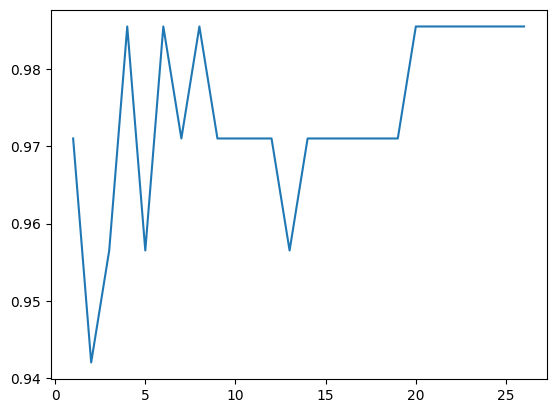

In [52]:
n=[]
acc=[]

for i in range(1,27):
    classifier_knn_trail=KNeighborsClassifier(n_neighbors=i,metric="minkowski",p=2)
    classifier_knn_trail.fit(x_train,y_train)
    c_knn_trail=confusion_matrix(y_test,classifier_knn_trail.predict(x_test))
    acc.append(sum(np.diag(c_knn_trail))/(np.sum(c_knn_trail)))
    n.append(i)
n=np.array(n)
acc=np.array(acc)
plt.plot(n,acc)
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix
c_knn=confusion_matrix(y_test,y_predict)
print(c_knn)
Accuracy_knn=sum(np.diag(c_knn))/(np.sum(c_knn))
Accuracy_knn

[[45  1]
 [ 0 23]]


0.9855072463768116

In [54]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_test,y_predict))
report = classification_report(y_test, y_predict, output_dict=True)
y_pred_proba = classifier_knn_trail.predict_proba(x_test)[:, 1]
Precision_knn = report['weighted avg']['precision']
Recall_knn = report['weighted avg']['recall']
F1_knn = report['weighted avg']['f1-score']
AUC_knn = roc_auc_score(y_test, y_pred_proba)

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        46
           4       0.96      1.00      0.98        23

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



##Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)# for gini 0.948905109489051
classifier_tree.fit(x_train, y_train)
y_predict = classifier_tree.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix
c_tree=confusion_matrix(y_test,y_predict)
print(c_tree)
Accuracy_tree=sum(np.diag(c_tree))/(np.sum(c_tree))
Accuracy_tree

[[44  2]
 [ 3 20]]


0.927536231884058

In [58]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_test,y_predict))
report = classification_report(y_test, y_predict, output_dict=True)
y_pred_proba = classifier_tree.predict_proba(x_test)[:, 1]
Precision_tree = report['weighted avg']['precision']
Recall_tree = report['weighted avg']['recall']
F1_tree = report['weighted avg']['f1-score']
AUC_tree = roc_auc_score(y_test, y_pred_proba)

              precision    recall  f1-score   support

           2       0.94      0.96      0.95        46
           4       0.91      0.87      0.89        23

    accuracy                           0.93        69
   macro avg       0.92      0.91      0.92        69
weighted avg       0.93      0.93      0.93        69



##Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier_ensemble = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_ensemble.fit(x_train, y_train)
y_predict = classifier_ensemble.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
c_ensemble=confusion_matrix(y_test,y_predict)
print(c_ensemble)
Accuracy_ensemble=sum(np.diag(c_ensemble))/(np.sum(c_ensemble))
Accuracy_ensemble

[[44  2]
 [ 0 23]]


0.9710144927536232

In [62]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_test,y_predict))
report = classification_report(y_test, y_predict, output_dict=True)
y_pred_proba = classifier_ensemble.predict_proba(x_test)[:, 1]
Precision_ensemble = report['weighted avg']['precision']
Recall_ensemble = report['weighted avg']['recall']
F1_ensemble = report['weighted avg']['f1-score']
AUC_ensemble = roc_auc_score(y_test, y_pred_proba)

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        46
           4       0.92      1.00      0.96        23

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



##Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [66]:
y_pred_binarized = np.where(y_pred >= 3, 4, 2)

correct = (y_test == y_pred_binarized).sum()
incorrect = (y_test != y_pred_binarized).sum()
accuracy = correct / (correct + incorrect) * 100
print('\nPercent Accuracy: %0.1f' % accuracy)


Percent Accuracy: 98.6


In [68]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
c_linear = confusion_matrix(y_test, y_pred_binarized, labels=[2, 4])
print(c_linear)
Accuracy_linear = sum(np.diag(c_linear)) / np.sum(c_linear)
print(classification_report(y_test, y_pred_binarized))
report = classification_report(y_test, y_pred_binarized, output_dict=True)
Precision_linear = report['weighted avg']['precision']
Recall_linear = report['weighted avg']['recall']
F1_linear = report['weighted avg']['f1-score']

[[45  1]
 [ 0 23]]
              precision    recall  f1-score   support

           2       1.00      0.98      0.99        46
           4       0.96      1.00      0.98        23

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [70]:
AUC_linear = 'null'

#Comparing the results of various models

In [71]:
d={'Accuracy(%)' : [Accuracy_linear, Accuracy_logistic, Accuracy_naive, Accuracy_svm, Accuracy_knn, Accuracy_tree, Accuracy_ensemble], 'Precision' : [Precision_linear, Precision_logistic, Precision_naive, Precision_svm, Precision_knn, Precision_tree, Precision_ensemble],'recall' : [Recall_linear, Recall_logistic, Recall_naive, Recall_svm, Recall_knn, Recall_tree, Recall_tree],'F1 Score' : [F1_linear, F1_logistic, F1_naive, F1_svm, F1_knn, F1_tree, F1_ensemble], 'AUC' : [AUC_linear, AUC_logistic, AUC_naive, AUC_svm, AUC_knn, AUC_tree, AUC_ensemble]}
Model_metrics = pd.DataFrame(d,index=['Linear Regression','Logistic Regression','Naive Bayes','Svm-Linear','KNN','Decison Tree','Random Forest'])

In [108]:
Model_metrics.to_csv("Model_metrics_90:10Split.csv")

In [72]:
Model_metrics

,Accuracy(%),Precision,recall,F1 Score,AUC
Linear Regression,0.985507,0.986111,0.985507,0.985582,null
Logistic Regression,0.971014,0.973333,0.971014,0.971296,0.996219
Naive Bayes,0.956522,0.961538,0.956522,0.957120,0.977316
Svm-Linear,0.956522,0.961538,0.956522,0.957120,0.996219
KNN,0.985507,0.986111,0.985507,0.985582,0.994329
Decison Tree,0.927536,0.927144,0.927536,0.927121,0.913043
Random Forest,0.971014,0.973333,0.927536,0.971296,0.973535


#Prediction

In [59]:
y_predict=lr.predict(np.array([[1,2,2,5,3,4,6,4,8]]))
y_predict_binarized = np.where(y_predict >= 3, 4, 2)
print(y_predict_binarized)

[2]


In [47]:
y_predict=classifier_ensemble.predict(np.array([[1,2,2,5,3,4,6,4,8]]))
print(y_predict)

[2]


In [2]:
%%C++
#include <iostream>
#include <conio.h>

UsageError: Cell magic `%%C++` not found.
